In [222]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8, 11, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# Load data
iris = datasets.load_iris()

# Make Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [223]:
'''Investigate the parameters of Random Forest classifier and tune them using Randomized Search and Grid Search. '''

from sklearn.metrics import make_scorer
from sklearn.model_selection import PredefinedSplit

# Split data and return indices as well
indices = np.arange(len(iris.data))
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(df[iris.feature_names], iris.target, indices,
                                                    test_size=0.2, stratify=iris.target, random_state=123456)

# Make array of indices whereby train indices = -1 and test indices = 0
indices = np.array(np.zeros(len(iris.data)))
for i in i_train:
    indices[i] = -1
ps = PredefinedSplit(indices)

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Create the scorers
scorers = {
            'precision_score': make_scorer(precision_score, average='macro'),
            'recall_score': make_scorer(recall_score, average='macro'),
            'accuracy_score': make_scorer(accuracy_score)
          }

rf = RandomForestClassifier()

In [277]:
# RANDOM SEARCH
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                               n_jobs=-1, random_state=123456, scoring=scorers, refit="accuracy_score", cv=ps)
rf_random.fit(iris.data, iris.target)

rand_avg = np.mean(rf_random.cv_results_['mean_test_accuracy_score'])
rand_recall = np.mean(rf_random.cv_results_['mean_test_recall_score'])
rand_precision = np.mean(rf_random.cv_results_['mean_test_precision_score'])
print(f'Mean accuracy with Random Search = {rand_avg*100:.1f}%')
print(f'Mean recall with Random Search = {rand_recall*100:.1f}%')
print(f'Mean precision with Random Search = {rand_precision*100:.1f}%')
print("Best parameters for Random Search =")
pprint(rf_random.best_params_)

Mean accuracy with Random Search = 91.6%
Mean recall with Random Search = 91.6%
Mean precision with Random Search = 93.4%
Best parameters for Random Search =
{'max_depth': 780,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 16}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [228]:
# Grid Search

'''2. Use seed 1 to split data in 80-20 train-test configuration.  Train a Random Forest classifier with 
each unique configuration and record train/test accuracy, precision and recall in the results dataframe. 
This dataframe will have 5 columns (each corresponding to tuning parameter) and each row will correspond
to each unique configuration. 5x5x5x5x5 rows. '''

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, verbose=2, 
                       scoring=scorers, refit="accuracy_score", error_score="raise", cv=ps)
rf_grid.fit(iris.data, iris.target)



Fitting 1 folds for each of 12000 candidates, totalling 12000 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             error_score='raise', estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 120, 230, 340, 450, 560, 670, 780,
                                       890, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 8, 11, 14],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20]},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score, average=macro),
                      'recall_score': make_scorer(recall_score, average=macro)},
             verbose=2)

In [235]:
avg = np.max(rf_grid.cv_results_['mean_test_accuracy_score'])
recall = np.max(rf_grid.cv_results_['mean_test_recall_score'])
precision = np.max(rf_grid.cv_results_['mean_test_precision_score'])
print(f'Best possible accuracy with Grid Search = {avg*100:.1f}%')
print(f'Best possible recall with Grid Search = {recall*100:.1f}%')
print(f'Best possible precision with Grid Search = {precision*100:.1f}%')
print("Best parameters for Grid Search =")



Best possible accuracy with Grid Search = 100.0%
Best possible recall with Grid Search = 100.0%
Best possible precision with Grid Search = 100.0%
Best parameters for Grid Search =


[Text(0.5, 0, 'Parameter Value'), Text(0, 0.5, 'Recall')]

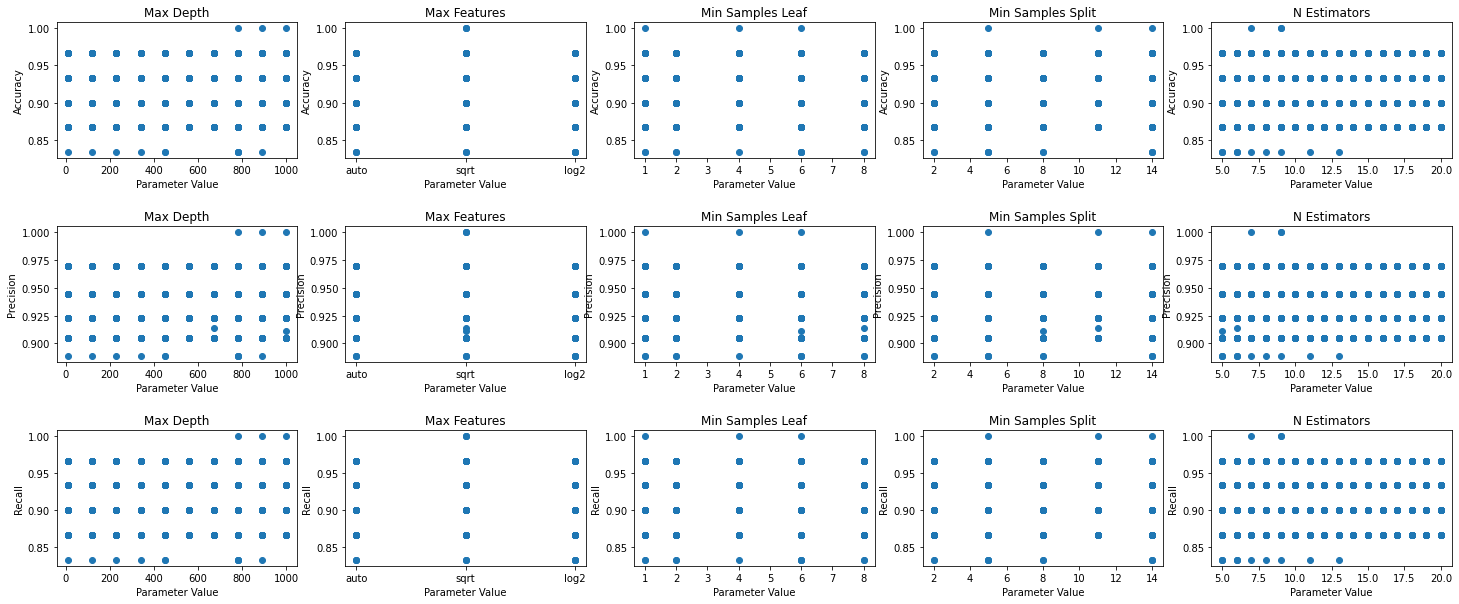

In [272]:
'''2. Analyse of the impact of each tuning parameter on predictor 
performance. **(15 Points)**'''

# Create the results dataframe and output to csv
# print(rf_grid.cv_results_.keys())
results = pd.concat([pd.DataFrame(rf_grid.cv_results_["params"]),
                     pd.DataFrame(rf_grid.cv_results_["mean_test_accuracy_score"], columns=["Accuracy"]), 
                     pd.DataFrame(rf_grid.cv_results_["mean_test_precision_score"], columns=["Precision"]), 
                     pd.DataFrame(rf_grid.cv_results_["mean_test_recall_score"], columns=["Recall"])], axis=1)
results.to_csv("results.csv")

fig, ax = plt.subplots(3,5, figsize=(25,10))
plt.subplots_adjust(hspace=0.5)

# Plots for Accuracy
ax[0, 0].scatter(x=results['max_depth'], y=results['Accuracy'])
ax[0,0].set_title("Max Depth")
ax[0,0].set(xlabel="Parameter Value", ylabel="Accuracy")

ax[0, 1].scatter(x=results['max_features'], y=results['Accuracy'])
ax[0, 1].set_title("Max Features")
ax[0,1].set(xlabel="Parameter Value", ylabel="Accuracy")

ax[0, 2].scatter(x=results['min_samples_leaf'], y=results['Accuracy'])
ax[0, 2].set_title("Min Samples Leaf")
ax[0,2].set(xlabel="Parameter Value", ylabel="Accuracy")

ax[0, 3].scatter(x=results['min_samples_split'], y=results['Accuracy'])
ax[0, 3].set_title("Min Samples Split")
ax[0,3].set(xlabel="Parameter Value", ylabel="Accuracy")

ax[0, 4].scatter(x=results['n_estimators'], y=results['Accuracy'])
ax[0, 4].set_title("N Estimators")
ax[0,4].set(xlabel="Parameter Value", ylabel="Accuracy")

# Plots for Precision
ax[1, 0].scatter(x=results['max_depth'], y=results['Precision'])
ax[1,0].set_title("Max Depth")
ax[1,0].set(xlabel="Parameter Value", ylabel="Precision")

ax[1, 1].scatter(x=results['max_features'], y=results['Precision'])
ax[1, 1].set_title("Max Features")
ax[1,1].set(xlabel="Parameter Value", ylabel="Precision")

ax[1, 2].scatter(x=results['min_samples_leaf'], y=results['Precision'])
ax[1, 2].set_title("Min Samples Leaf")
ax[1,2].set(xlabel="Parameter Value", ylabel="Precision")

ax[1, 3].scatter(x=results['min_samples_split'], y=results['Precision'])
ax[1, 3].set_title("Min Samples Split")
ax[1,3].set(xlabel="Parameter Value", ylabel="Precision")

ax[1, 4].scatter(x=results['n_estimators'], y=results['Precision'])
ax[1, 4].set_title("N Estimators")
ax[1,4].set(xlabel="Parameter Value", ylabel="Precision")

# Plots for Recall
ax[2, 0].scatter(x=results['max_depth'], y=results['Recall'])
ax[2,0].set_title("Max Depth")
ax[2,0].set(xlabel="Parameter Value", ylabel="Recall")

ax[2, 1].scatter(x=results['max_features'], y=results['Recall'])
ax[2, 1].set_title("Max Features")
ax[2,1].set(xlabel="Parameter Value", ylabel="Recall")

ax[2, 2].scatter(x=results['min_samples_leaf'], y=results['Recall'])
ax[2, 2].set_title("Min Samples Leaf")
ax[2,2].set(xlabel="Parameter Value", ylabel="Recall")

ax[2, 3].scatter(x=results['min_samples_split'], y=results['Recall'])
ax[2, 3].set_title("Min Samples Split")
ax[2,3].set(xlabel="Parameter Value", ylabel="Recall")

ax[2, 4].scatter(x=results['n_estimators'], y=results['Recall'])
ax[2, 4].set_title("N Estimators")
ax[2,4].set(xlabel="Parameter Value", ylabel="Recall")



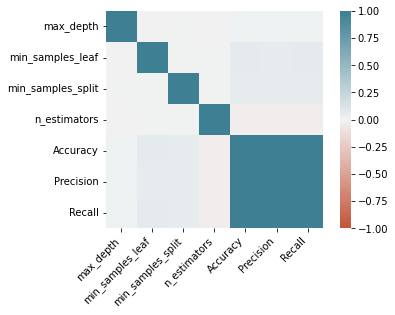

In [273]:
# Show the correlations
corr = results.corr()
heat = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

As can be seen from the correlations table above, none of the hyperparameters on thier own have a strong correlation with Accuracy, Precision, or Recall in this dataset. Accuracy, Precision, and Recall have a correlation of ~1 with each other however. This tells me that the hyperparameters needs to be tuned in combination to optimize the accuracy/recall/precision of the model. 

# Max Depth
Accuracy, Precision, and Recall are highest when the max depth is highest (i.e., 800+). That is because the trees in the random forest can form to the training data completely when they are allowed to have such a high depth. The downside with this such a high depth is overfitting to the training data / lack of ability to generalize.

# Max Features
Accuracy, Precision, and Recall are highest (equal to 100%) when max features equals "sqrt". This means that when building a single decision tree in the forest, the maximum number of features that the tree can use to split the data equals the square root of the total number of features in the dataset. However, max features by itself is not strongly correlated with the scores.

# Min Samples Leaf
This hyperparameter indicates the minimum number of instances on a leaf node after splitting a node so that we can prevent the model from overfitting. The scores are maximized when when this hyperparameter is either 1, 4, or 6. There is week/no correlation in this dataset between this hyperparameter and the scores. Having a low min_samples_leaf parameter aligns with having a very high max depth parameter and means the model is aligning strongly with the dataset and likely overfitting.

# Min Samples Split
This hyperparameter indicates the minimum number of instances that must be present in a given node in order for a split to occur - which is used to prevent overfitting. As the min_samples_split parameters gets smaller, the model is able to get deeper and conform more to the training data - raising the risk of overfitting. In the Iris dataset, the min_samples_split does not correlate with the scores. I observed that a min_samples_split of either 5 or 11 maximized the scores, however the model was able to acheive accuracy of 0.95 or greater for all possible values of this hyperparamter (2-14). 

# N Estimators
This hyperparameter indicates the number of trees in the random forest model used. By using more trees in the model, we should achive better accuracy/recall/precision - however the time complexity increases and the scores level off at a certain point - so it's a tradeoff. In the above model, we tested between 5 and 20 trees to be used in the model and we observed scores of 0.95 or greater for all values tested. If we would have tested values between 5 and 1000 for example, we would have observed that model scores were optimized at 10 trees with a far lower time complexity than if we had used 1000.

In [279]:
'''3. From the results of the above find the best estimators and use them for classifcation once again 
and evaluate the performance using 10 fold cross validation. **(15 Points)**'''

from sklearn.model_selection import cross_validate, KFold
kfold = KFold(n_splits=10)
params = rf_grid.best_params_
rf_best = RandomForestClassifier()
rf_best.set_params(**params)
results = cross_validate(estimator=rf_best, X=X_train, y=y_train, cv=kfold, scoring=scorers)
print("Optimized Model:")
print("Recall:", round(np.mean(results["test_recall_score"]),4))
print("Accuracy:", round(np.mean(results["test_accuracy_score"]),4))
print("Precision:", round(np.mean(results["test_precision_score"]),4))
print("Optimial Params =", params)

Optimized Model:
Recall: 0.9589
Accuracy: 0.9583
Precision: 0.9531
Optimial Params = {'max_depth': 780, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 9}
